## 1. IMPORTAR LIBRERIAS

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 2. CARGA DE DATOS

In [55]:
# Cargar un dataset 

ruta = r"C:\Users\9 ----- SIG\Downloads\ventas_supermercado.xlsx"
df_ventas = pd.read_excel(ruta)

# Ordenar por fecha y guardar
df_ventas = df_ventas.sort_values('Fecha').reset_index(drop=True)

In [56]:
df_ventas

,Fecha,Producto,Precio_Venta,Costo_Unitario,Cantidad
0,2025-01-06,Arroz Roa 1kg,4500,3100,1161
1,2025-01-06,Arroz Roa 1kg V2,4950,3410,984
2,2025-01-06,Arroz Roa 1kg V2,4950,3410,1000
3,2025-01-06,Arroz Roa 1kg V2,4950,3410,1057
4,2025-01-06,Arroz Roa 1kg V2,4950,3410,1032
...,...,...,...,...,...
2595,2025-12-29,Arroz Roa 1kg V2,5409,3410,1342
2596,2025-12-29,Arroz Roa 1kg V2,5409,3410,1296
2597,2025-12-29,Arroz Roa 1kg V2,5409,3410,1318
2598,2025-12-29,Arroz Roa 1kg V2,5409,3410,1363


In [60]:
# ANÁLISIS DESCRIPTIVOS PROMEDIOS DE PRECIOS Y MEDIANAS

# 1. Agrupar por producto y calcular ambas métricas
analisis_estastico = df_ventas.groupby('Producto').agg({
    'Precio_Venta': ['mean', 'median'],
    'Costo_Unitario': ['mean', 'median']})

# 2. Aplanar las columnas (para que sea fácil de leer)
analisis_estastico.columns = ['Precio_Promedio', 'Precio_Mediana', 'Costo_Promedio', 'Costo_Mediana']

# 4. Formatear para lectura clara
pd.options.display.float_format = '{:,.2f}'.format
display(analisis_estastico)

,Precio_Promedio,Precio_Mediana,Costo_Promedio,Costo_Mediana
Producto,,,,
Aceite Gourmet 1L,"14,946.40","14,935.00","9,200.00","9,200.00"
Arroz Roa 1kg,"4,570.38","4,635.00","3,100.00","3,100.00"
Arroz Roa 1kg V2,"5,104.94","5,098.00","3,410.00","3,410.00"
Azúcar Manuelita 1kg,"4,305.71","4,326.00","2,800.00","2,800.00"
Café Sello Rojo 500g,"20,043.94","20,085.00","12,500.00","12,500.00"
Cerveza Club Colombia 6pk,"21,406.00","21,630.00","13,000.00","13,000.00"
Coca Cola 1.5L,"6,012.98","5,974.00","3,400.00","3,400.00"
Detergente Ariel 2kg,"28,526.31","28,840.00","18,000.00","18,000.00"
Frijol Bola Roja 500g,"6,718.85","6,695.00","4,200.00","4,200.00"


## CÁLCULOS FINANCIEROS

In [61]:
# 2. Cálculos financieros básicos
df_ventas['ingresos_totales'] = df_ventas['Precio_Venta'] * df_ventas['Cantidad']
df_ventas['costos_totales'] = df_ventas['Costo_Unitario'] * df_ventas['Cantidad']
df_ventas['margen_total'] = df_ventas['ingresos_totales'] - df_ventas['costos_totales']
df_ventas['porcentaje_margen'] = (df_ventas['margen_total'] / df_ventas['ingresos_totales']) * 100
df_ventas.head()

,Fecha,Producto,Precio_Venta,Costo_Unitario,Cantidad,ingresos_totales,costos_totales,margen_total,porcentaje_margen
0,2025-01-06,Arroz Roa 1kg,4500,3100,1161,5224500,3599100,1625400,31.11
1,2025-01-06,Arroz Roa 1kg V2,4950,3410,984,4870800,3355440,1515360,31.11
2,2025-01-06,Arroz Roa 1kg V2,4950,3410,1000,4950000,3410000,1540000,31.11
3,2025-01-06,Arroz Roa 1kg V2,4950,3410,1057,5232150,3604370,1627780,31.11
4,2025-01-06,Arroz Roa 1kg V2,4950,3410,1032,5108400,3519120,1589280,31.11


In [5]:
# Ver resumen por producto
resumen = df_ventas.groupby('Producto').agg({
    'Cantidad': 'sum',
    'ingresos_totales': 'sum',
    'margen_total': 'sum',
    'Precio_Venta': 'mean'
}).rename(columns={'Precio_Venta': 'precio_promedio'})

resumen

,Cantidad,ingresos_totales,margen_total,precio_promedio
Producto,,,,
Aceite Gourmet 1L,17971,268334859,103001659,14946.403846
Arroz Roa 1kg,59258,270099902,86400102,4570.384615
Arroz Roa 1kg V2,1602728,8182368783,2717066303,5104.942949
Azúcar Manuelita 1kg,63118,271698870,94968470,4305.711538
Café Sello Rojo 500g,13659,273680044,102942544,20043.942308
Cerveza Club Colombia 6pk,12382,262075135,101109135,21406.000000
Coca Cola 1.5L,44374,266365386,115493786,6012.980769
Detergente Ariel 2kg,9393,267451675,98377675,28526.307692
Frijol Bola Roja 500g,40254,270050831,100984031,6718.846154


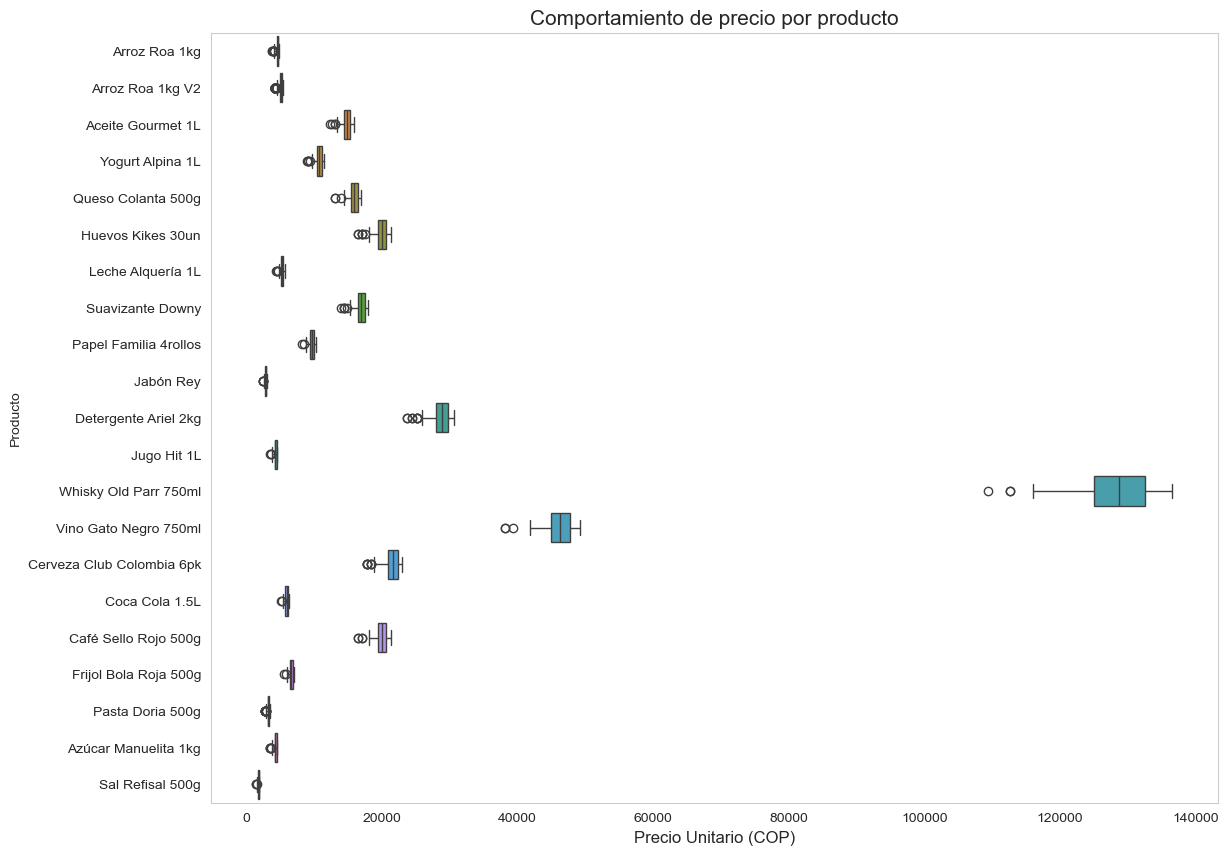

In [6]:
# Boxplot para ver precios por producto

# Configuración visual
plt.figure(figsize=(13, 10))
sns.set_style("whitegrid")
sns.boxplot(data=df_ventas, x='Precio_Venta',y= 'Producto', hue='Producto',legend = False)
plt.title('Comportamiento de precio por producto', fontsize=15)
plt.xlabel('Precio Unitario (COP)', fontsize=12)
plt.grid(False);

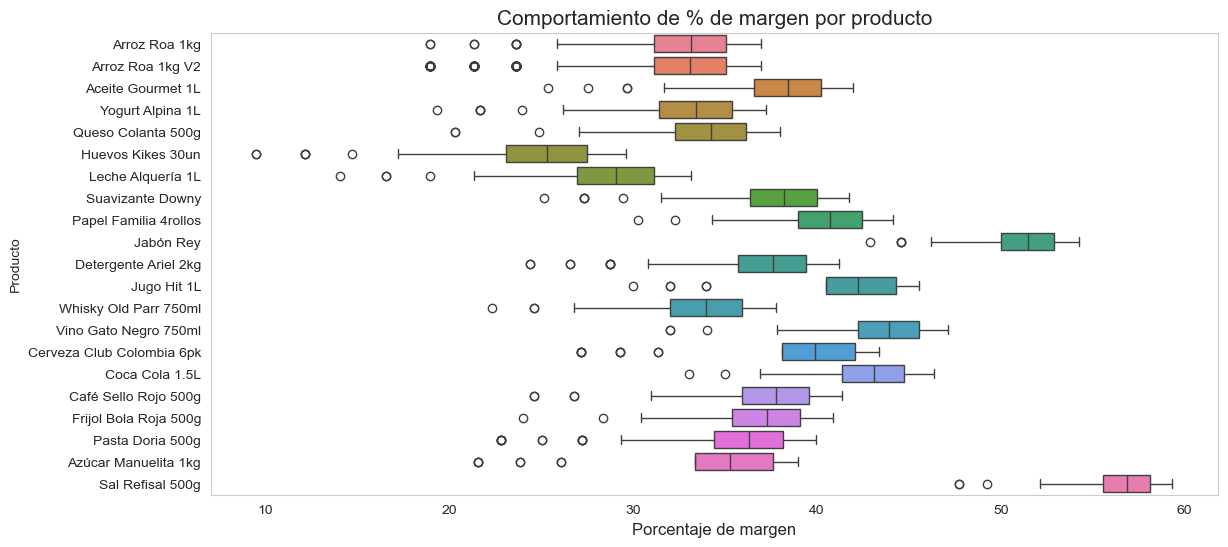

In [7]:
# Boxplot para ver costos por producto

# Configuración visual
plt.figure(figsize=(13, 6))
sns.set_style("whitegrid")
sns.boxplot(data=df_ventas, x='porcentaje_margen', y= 'Producto', hue='Producto', legend = False)
plt.title('Comportamiento de % de margen por producto', fontsize=15)
plt.xlabel('Porcentaje de margen', fontsize=12)
plt.grid(False);

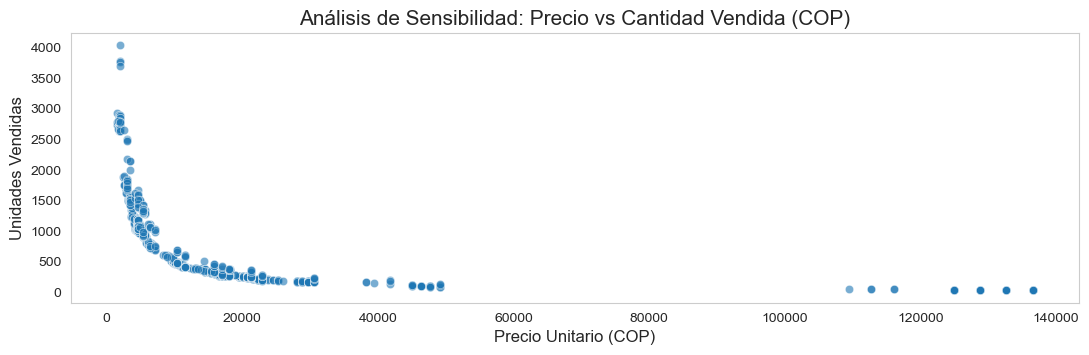

In [8]:
# Configuración visual
plt.figure(figsize=(13, 3.5))
sns.set_style("whitegrid")

# gráfico de los productos
sns.scatterplot(data=df_ventas, x='Precio_Venta', y='Cantidad', alpha=0.6)
plt.title('Análisis de Sensibilidad: Precio vs Cantidad Vendida (COP)', fontsize=15)
plt.xlabel('Precio Unitario (COP)', fontsize=12)
plt.ylabel('Unidades Vendidas', fontsize=12)
plt.grid(False);

## CÁLCULO DE LA ELASTICIDAD DE LA DEMANDA

La elasticidad de la demanda mide qué tan "sensibles" son los clientes ante cambios en el precio. Indica cuánto cambia la cantidad demandada cuando el precio sube o baja.

**Conceptos Clave**
• **Demanda Inelástica** ($E < 1$): El cliente es poco sensible al precio. Aunque el precio suba, la cantidad vendida baja muy poco.

  • Ejemplo: Café tradicional o medicamentos.
  • Estrategia: Se pueden subir precios para mejorar el margen.

• **Demanda Elástica** ($E > 1$): El cliente es muy sensible. Un pequeño aumento en el precio provoca una gran caída en las ventas.

  • Ejemplo: Aceite de oliva premium o artículos de lujo.
  • Estrategia: Se debe ser cuidadoso con las alzas; la rentabilidad depende del volumen.

**Resumen Estratégico**

• Inelástico: Poder de fijación de precios.
• Elástico: Competencia por precio y eficiencia en costos.

In [10]:
# 1. Crear una lista para guardar los resultados de cada producto
resultados_elasticidad = []

# 2. Iterar por cada producto para calcular su elasticidad individual
for producto in df_ventas['Producto'].unique():
    df_prod = df_ventas[df_ventas['Producto'] == producto].copy()
    
    # Aplicamos logaritmo natural a Precio y Cantidad
    # Esto permite que el coeficiente sea la elasticidad constante
    df_prod['log_P'] = np.log(df_prod['Precio_Venta'])
    df_prod['log_Q'] = np.log(df_prod['Cantidad'])
    
    # Definimos variables para la regresión
    X = sm.add_constant(df_prod['log_P']) # Variable independiente (Precio)
    y = df_prod['log_Q']                  # Variable dependiente (Cantidad)
    
    # Ajustamos el modelo OLS (Mínimos Cuadrados Ordinarios)
    modelo = sm.OLS(y, X).fit()
    
    # El coeficiente de 'log_P' es nuestra elasticidad
    coef_elasticidad = modelo.params['log_P']
    r_cuadrado = modelo.rsquared # Qué tan bien explica el precio a las ventas
    
    resultados_elasticidad.append({
        'Producto': producto,
        'Elasticidad': round(abs(coef_elasticidad), 2),
        'R_Cuadrado': round(r_cuadrado, 3)
    })

# 3. Convertir a DataFrame y clasificar
df_final = pd.DataFrame(resultados_elasticidad)
df_final

,Producto,Elasticidad,R_Cuadrado
0,Arroz Roa 1kg,0.55,0.154
1,Arroz Roa 1kg V2,0.04,0.001
2,Aceite Gourmet 1L,0.38,0.055
3,Yogurt Alpina 1L,1.14,0.365
4,Queso Colanta 500g,1.11,0.306
5,Huevos Kikes 30un,0.47,0.106
6,Leche Alquería 1L,0.29,0.033
7,Suavizante Downy,1.10,0.395
8,Papel Familia 4rollos,0.56,0.075
9,Jabón Rey,0.03,0.000


**¿Qué es el R-Cuadrado ($R^2$)?**

Es la métrica de confiabilidad del modelo. Indica qué tanto explica el Precio a la Cantidad Vendida.

**Rango**: Va de 0 a 1 (0% a 100%).**$R^2$ Alto** (ej. 0.85): El precio es el factor principal. Tu cálculo de elasticidad es muy confiable para tomar decisiones.

**$R^2$ Bajo** (ej. 0.20): Las ventas dependen de otros factores (clima, publicidad, azar). No te fíes solo de la elasticidad en este producto.

In [20]:
# Clasificar productos de acuerdo a su elasticidad

def clasificar(e):
    if e < 1: return 'Inelástico (Poca sensibilidad)'
    elif e > 1: return 'Elástico (Muy sensible)'
    else: return 'Unitario'

df_final['Tipo_Demanda'] = df_final['Elasticidad'].apply(clasificar)

# Mostrar resultados con formato
print("COEFICIENTES DE ELASTICIDAD POR PRODUCTO")
df_final.sort_values(by='Elasticidad')

COEFICIENTES DE ELASTICIDAD POR PRODUCTO


,Producto,Elasticidad,R_Cuadrado,Tipo_Demanda
9,Jabón Rey,0,0,Inelástico (Poca sensibilidad)
1,Arroz Roa 1kg V2,0,0,Inelástico (Poca sensibilidad)
19,Azúcar Manuelita 1kg,0,0,Inelástico (Poca sensibilidad)
16,Café Sello Rojo 500g,0,0,Inelástico (Poca sensibilidad)
6,Leche Alquería 1L,0,0,Inelástico (Poca sensibilidad)
20,Sal Refisal 500g,0,0,Inelástico (Poca sensibilidad)
2,Aceite Gourmet 1L,0,0,Inelástico (Poca sensibilidad)
18,Pasta Doria 500g,0,0,Inelástico (Poca sensibilidad)
10,Detergente Ariel 2kg,0,0,Inelástico (Poca sensibilidad)
5,Huevos Kikes 30un,0,0,Inelástico (Poca sensibilidad)


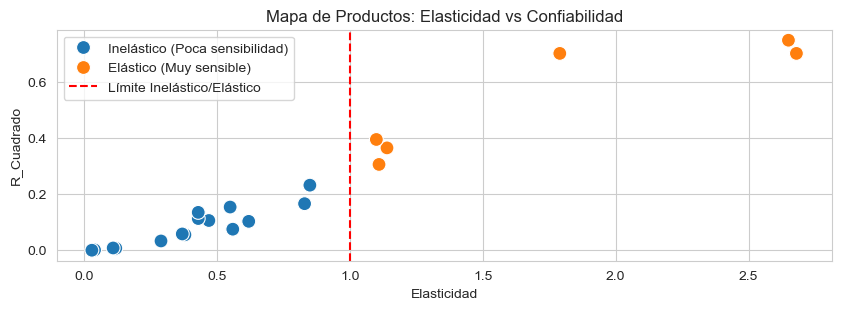

In [21]:
# CORRACIÓN ENTRE ESLASTICIDAD Y CONFIABILIDAD (R2 CUADRADO)

plt.figure(figsize=(10, 3))
sns.scatterplot(data=df_final, x='Elasticidad', y='R_Cuadrado', hue='Tipo_Demanda', s=100)
plt.axvline(1, color='red', linestyle='--', label='Límite Inelástico/Elástico')
plt.title('Mapa de Productos: Elasticidad vs Confiabilidad')
plt.legend();

**¿Qué es el modelo Log-Log?** 

Es una técnica donde aplicas logaritmos naturales al Precio y a la Cantidad antes de hacer la regresión. Su gran ventaja es que el resultado es directamente el Coeficiente de Elasticidad: nos dice en qué porcentaje (%) cambian las ventas si subes el precio un 1%. Es la forma más precisa de medir la sensibilidad del cliente sin que importen las unidades o el valor del producto.

## 4 CALCULO QUE SIMULA GANACIA PERDIDA DEPENDIENDO EL PCT DEL PRECIO

In [13]:
# 1. Entrada de datos
cambio_solicitado = float(input("Ingresa el % de cambio de precio (ej: 10 para subir, -5 para bajar): "))
factor_p = cambio_solicitado / 100

print(f"\n--- TABLA DE DECISIÓN ESTRATÉGICA: IMPACTO DE UN {cambio_solicitado}% ---")

impacto_completo = []

for index, row in df_final.iterrows():
    prod = row['Producto']
    e = row['Elasticidad']
    
    # --- Impacto en Cantidad (Volumen) ---
    impacto_q_pct = factor_p * -e
    
    # --- Impacto en Dinero (Ingresos) ---
    # Calculamos el ingreso actual para este producto
    ingreso_actual = df_ventas[df_ventas['Producto'] == prod]['ingresos_totales'].sum()
    
    # Nuevo Ingreso = Ingreso Actual * (1 + %ΔP) * (1 + %ΔQ)
    nuevo_ingreso = ingreso_actual * (1 + factor_p) * (1 + impacto_q_pct)
    diferencia_dinero = nuevo_ingreso - ingreso_actual
    
    # --- Clasificación de Riesgo ---
    if impacto_q_pct < -0.15: # Pierdes más del 15% de clientes
        riesgo = "CRÍTICO: Fuga masiva"
    elif impacto_q_pct < -0.05:
        riesgo = "MODERADO: Alerta"
    else:
        riesgo = "BAJO: Controlado"
        
    impacto_completo.append({
        'Producto': prod,
        'Elasticidad': e,
        'Impacto_Ventas_%': f"{impacto_q_pct * 100:.2f}%",
        'Ingreso_Actual': ingreso_actual,
        'Ganancia/Perdida_COP': diferencia_dinero,
        'Riesgo_Volumen': riesgo
    })

# 2. Crear DataFrame y dar formato
df_estrategico = pd.DataFrame(impacto_completo)

# Formatear columnas de dinero para que se vean bien en el portafolio
df_estrategico['Ingreso_Actual'] = df_estrategico['Ingreso_Actual'].apply(lambda x: f"${x:,.0f}")
df_estrategico['Ganancia/Perdida_COP'] = df_estrategico['Ganancia/Perdida_COP'].apply(lambda x: f"${x:,.0f}")

# Ordenar por el que más dinero nos deja
df_estrategico = df_estrategico.sort_values(by='Ganancia/Perdida_COP', ascending=False)
df_estrategico

Ingresa el % de cambio de precio (ej: 10 para subir, -5 para bajar):  5



--- TABLA DE DECISIÓN ESTRATÉGICA: IMPACTO DE UN 5.0% ---


,Producto,Elasticidad,Impacto_Ventas_%,Ingreso_Actual,Ganancia/Perdida_COP,Riesgo_Volumen
6,Leche Alquería 1L,0.29,-1.45%,"$271,719,342","$9,449,040",BAJO: Controlado
20,Sal Refisal 500g,0.37,-1.85%,"$275,598,795","$8,426,433",BAJO: Controlado
2,Aceite Gourmet 1L,0.38,-1.90%,"$268,334,859","$8,063,463",BAJO: Controlado
18,Pasta Doria 500g,0.43,-2.15%,"$271,113,803","$7,435,296",BAJO: Controlado
10,Detergente Ariel 2kg,0.43,-2.15%,"$267,451,675","$7,334,862",BAJO: Controlado
5,Huevos Kikes 30un,0.47,-2.35%,"$270,891,672","$6,860,332",BAJO: Controlado
0,Arroz Roa 1kg,0.55,-2.75%,"$270,099,902","$5,705,860",BAJO: Controlado
8,Papel Familia 4rollos,0.56,-2.80%,"$266,597,800","$5,491,915",BAJO: Controlado
17,Frijol Bola Roja 500g,0.62,-3.10%,"$270,050,831","$4,712,387",BAJO: Controlado
1,Arroz Roa 1kg V2,0.04,-0.20%,"$8,182,368,783","$391,935,465",BAJO: Controlado


## 5. CÁLCULO DEL PRECIO ÓPTIMO PARA CADA PRODUCTO

In [14]:
# 1. Función para calcular el precio óptimo basado en margen y elasticidad
def simulador_precio_optimo():
    print("--- SIMULADOR DE PRECIO ESTRATÉGICO ---")
    print(f"Productos disponibles: {', '.join(df_final['Producto'].tolist())}")
    
    # Pedir el nombre del producto al usuario
    seleccion = input("\nIngresa el nombre del producto para optimizar: ")
    
    if seleccion not in df_final['Producto'].tolist():
        print("Producto no encontrado. Revisa que esté escrito igual que en la lista.")
        return

    # Extraer métricas necesarias para el cálculo
    elasticidad = df_final.loc[df_final['Producto'] == seleccion, 'Elasticidad'].values[0]
    confiabilidad = df_final.loc[df_final['Producto'] == seleccion, 'R_Cuadrado'].values[0]
    costo_u = df_ventas[df_ventas['Producto'] == seleccion]['Costo_Unitario'].mean()
    precio_actual = df_ventas[df_ventas['Producto'] == seleccion]['Precio_Venta'].mean()

    # FÓRMULA DE OPTIMIZACIÓN (Economía Matemática):
    # El precio que maximiza la utilidad es: Costo / (1 - (1/Elasticidad))
    # Para productos inelásticos (E < 1), la fórmula matemática tiende a infinito, 
    # así que usamos un tope de seguridad comercial del +20%
    
    if elasticidad > 1.05:
        precio_sugerido = costo_u / (1 - (1 / elasticidad))
    else:
        # Si es inelástico, recomendamos subir precio gradualmente (Tope 20%)
        precio_sugerido = precio_actual * 1.20

    # Determinar nivel de confianza
    nivel_confianza = "ALTA" if confiabilidad > 0.7 else "MEDIA" if confiabilidad > 0.4 else "BAJA (Usar con cautela)"

    # RESULTADOS
    print(f"\n--- RESULTADOS PARA: {seleccion} ---")
    print(f"• Precio Actual: ${precio_actual:,.0f} COP")
    print(f"• Costo Unitario: ${costo_u:,.0f} COP")
    print(f"• Coeficiente de Elasticidad: {elasticidad}")
    print(f"• Confiabilidad del análisis (R²): {confiabilidad} ({nivel_confianza})")
    print("-" * 40)
    print(f"👉 PRECIO RECOMENDADO: ${precio_sugerido:,.0f} COP")
    
    if precio_sugerido > precio_actual:
        print(f"📈 Sugerencia: Subir el precio un {((precio_sugerido/precio_actual)-1)*100:.1f}% para maximizar el margen.")
    else:
        print(f"📉 Sugerencia: Bajar el precio un {(1-(precio_sugerido/precio_actual))*100:.1f}% para recuperar volumen de ventas.")

In [15]:
# Ejecutar el simulador
simulador_precio_optimo()

--- SIMULADOR DE PRECIO ESTRATÉGICO ---
Productos disponibles: Arroz Roa 1kg, Arroz Roa 1kg V2, Aceite Gourmet 1L, Yogurt Alpina 1L, Queso Colanta 500g, Huevos Kikes 30un, Leche Alquería 1L, Suavizante Downy, Papel Familia 4rollos, Jabón Rey, Detergente Ariel 2kg, Jugo Hit 1L, Whisky Old Parr 750ml, Vino Gato Negro 750ml, Cerveza Club Colombia 6pk, Coca Cola 1.5L, Café Sello Rojo 500g, Frijol Bola Roja 500g, Pasta Doria 500g, Azúcar Manuelita 1kg, Sal Refisal 500g



Ingresa el nombre del producto para optimizar:  Frijol Bola Roja 500g



--- RESULTADOS PARA: Frijol Bola Roja 500g ---
• Precio Actual: $6,719 COP
• Costo Unitario: $4,200 COP
• Coeficiente de Elasticidad: 0.62
• Confiabilidad del análisis (R²): 0.103 (BAJA (Usar con cautela))
----------------------------------------
👉 PRECIO RECOMENDADO: $8,063 COP
📈 Sugerencia: Subir el precio un 20.0% para maximizar el margen.


## PARTE 2: SIMULACIÓN DE ESCENARIOS (AUMENTO SALARIO MÍNIMO 23%)

In [16]:
# SIMULACIÓN ESCENARIO 

incremento = 0.23

# 2. Crear una copia para la simulación
df_simulacion = df_ventas.copy()

# 3. Calcular los nuevos valores impactados por el 23%
df_simulacion['Costo_Unitario_Simulado'] = df_simulacion['Costo_Unitario'] * (1 + incremento)
df_simulacion['costos_totales_simulados'] = df_simulacion['Costo_Unitario_Simulado'] * df_simulacion['Cantidad']

# 4. El Margen Nuevo (Precio_Venta se mantiene igual, pero el costo subió)
df_simulacion['margen_total_simulado'] = df_simulacion['ingresos_totales'] - df_simulacion['costos_totales_simulados']
df_simulacion['porcentaje_margen_simulado'] = (df_simulacion['margen_total_simulado'] / df_simulacion['ingresos_totales']) * 100
df_simulacion.head(3)

,Fecha,Producto,Precio_Venta,Costo_Unitario,Cantidad,ingresos_totales,costos_totales,margen_total,porcentaje_margen,Costo_Unitario_Simulado,costos_totales_simulados,margen_total_simulado,porcentaje_margen_simulado
0,2025-01-06,Arroz Roa 1kg,4500,3100,1161,5224500,3599100,1625400,31.111111,3813.0,4426893.0,797607.0,15.266667
1,2025-01-06,Arroz Roa 1kg V2,4950,3410,984,4870800,3355440,1515360,31.111111,4194.3,4127191.2,743608.8,15.266667
2,2025-01-06,Arroz Roa 1kg V2,4950,3410,1000,4950000,3410000,1540000,31.111111,4194.3,4194300.0,755700.0,15.266667


In [18]:
# 5. Comparativa Agrupada por Producto

# Configurar Pandas para mostrar números grandes de forma legible
pd.options.display.float_format = '{:,.0f}'.format

resumen_impacto = df_simulacion.groupby('Producto').agg({
    'margen_total': 'sum',
    'margen_total_simulado': 'sum'
}).reset_index()

resumen_impacto['Perdida_Margen_Absoluta'] = resumen_impacto['margen_total'] - resumen_impacto['margen_total_simulado']
resumen_impacto['Pct_Reduccion_Utilidad'] = (resumen_impacto['Perdida_Margen_Absoluta'] / resumen_impacto['margen_total']) * 100
resumen_impacto

,Producto,margen_total,margen_total_simulado,Perdida_Margen_Absoluta,Pct_Reduccion_Utilidad
0,Aceite Gourmet 1L,103001659,"64,975,023","38,026,636",37
1,Arroz Roa 1kg,86400102,"44,149,148","42,250,954",49
2,Arroz Roa 1kg V2,2717066303,"1,460,046,733","1,257,019,570",46
3,Azúcar Manuelita 1kg,94968470,"54,320,478","40,647,992",43
4,Café Sello Rojo 500g,102942544,"63,672,919","39,269,625",38
5,Cerveza Club Colombia 6pk,101109135,"64,086,955","37,022,180",37
6,Coca Cola 1.5L,115493786,"80,793,318","34,700,468",30
7,Detergente Ariel 2kg,98377675,"59,490,655","38,887,020",40
8,Frijol Bola Roja 500g,100984031,"62,098,667","38,885,364",39
9,Huevos Kikes 30un,67191672,"20,340,672","46,851,000",70


### PUNTO DE EQUILIBRIO, QUE TANTO SUBIR EL PRECIO PARA RECUPERAR MARGEN

In [23]:
# 1. Configuración de formato para gerencia
pd.options.display.float_format = '{:,.0f}'.format

# 2. Unir datos de Elasticidad con el resumen de impacto
df_recuperacion = pd.merge(
    resumen_impacto, 
    df_final[['Producto', 'Elasticidad', 'R_Cuadrado', 'Tipo_Demanda']], 
    on='Producto'
)

# 3. Calcular el Precio de Equilibrio
# Para ganar lo mismo por unidad que antes, el aumento de precio debe ser igual al aumento del costo.
df_recuperacion['Costo_Unitario_Prom'] = df_ventas.groupby('Producto')['Costo_Unitario'].mean().values
df_recuperacion['Precio_Venta_Prom'] = df_ventas.groupby('Producto')['Precio_Venta'].mean().values

# El aumento en el costo es del 23%
aumento_abs_costo = df_recuperacion['Costo_Unitario_Prom'] * 0.23
df_recuperacion['Precio_Equilibrio'] = df_recuperacion['Precio_Venta_Prom'] + aumento_abs_costo

# 4. Simular el impacto de subir el precio al nivel de equilibrio
df_recuperacion['Subida_Precio_%'] = ((df_recuperacion['Precio_Equilibrio'] / df_recuperacion['Precio_Venta_Prom']) - 1) * 100
df_recuperacion['Caida_Ventas_Esperada_%'] = df_recuperacion['Subida_Precio_%'] * df_recuperacion['Elasticidad']

# 5. Definir la viabilidad estratégica
def evaluar_viabilidad(row):
    if row['Elasticidad'] < 0.6 and row['Caida_Ventas_Esperada_%'] < 10:
        return "ALTA: Trasladar costo al cliente"
    elif row['Elasticidad'] < 1.0:
        return "MEDIA: Subida parcial recomendada"
    else:
        return "BAJA: Riesgo de pérdida masiva"

df_recuperacion['Viabilidad_Recuperacion'] = df_recuperacion.apply(evaluar_viabilidad, axis=1)

# 6. Mostrar tabla final para Gerencia
cols_finales = [
    'Producto', 'Tipo_Demanda', 'Elasticidad', 'Subida_Precio_%', 
    'Caida_Ventas_Esperada_%', 'Viabilidad_Recuperacion'
]

df_recuperacion[cols_finales].sort_values(by='Elasticidad')

,Producto,Tipo_Demanda,Elasticidad,Subida_Precio_%,Caida_Ventas_Esperada_%,Viabilidad_Recuperacion
10,Jabón Rey,Inelástico (Poca sensibilidad),0,11,0,ALTA: Trasladar costo al cliente
2,Arroz Roa 1kg V2,Inelástico (Poca sensibilidad),0,15,1,ALTA: Trasladar costo al cliente
3,Azúcar Manuelita 1kg,Inelástico (Poca sensibilidad),0,15,2,ALTA: Trasladar costo al cliente
4,Café Sello Rojo 500g,Inelástico (Poca sensibilidad),0,14,2,ALTA: Trasladar costo al cliente
12,Leche Alquería 1L,Inelástico (Poca sensibilidad),0,16,5,ALTA: Trasladar costo al cliente
16,Sal Refisal 500g,Inelástico (Poca sensibilidad),0,10,4,ALTA: Trasladar costo al cliente
0,Aceite Gourmet 1L,Inelástico (Poca sensibilidad),0,14,5,ALTA: Trasladar costo al cliente
7,Detergente Ariel 2kg,Inelástico (Poca sensibilidad),0,15,6,ALTA: Trasladar costo al cliente
14,Pasta Doria 500g,Inelástico (Poca sensibilidad),0,15,6,ALTA: Trasladar costo al cliente
9,Huevos Kikes 30un,Inelástico (Poca sensibilidad),0,17,8,ALTA: Trasladar costo al cliente


In [36]:
# NUEVO ESCENARIO DONDE SE SUBEN LOS PRECIOS DE ACUERDO AL MARGEN 

# 1. Preparar la base con Elasticidad y Datos Actuales
df_final_estrategia = pd.merge(
    resumen_impacto, 
    df_final[['Producto', 'Elasticidad', 'Tipo_Demanda']], 
    on='Producto'
)

# 2. Obtener precios y costos promedio actuales
info_promedio = df_ventas.groupby('Producto').agg({
    'Precio_Venta': 'mean',
    'Costo_Unitario': 'mean',
    'Cantidad': 'sum'
}).reset_index()

df_final_estrategia = pd.merge(df_final_estrategia, info_promedio, on='Producto')

# 3. CÁLCULOS DE EQUILIBRIO
aumento_costo = 0.23
df_final_estrategia['Nuevo_Costo_U'] = df_final_estrategia['Costo_Unitario'] * (1 + aumento_costo)
df_final_estrategia['Margen_Unitario_Original'] = df_final_estrategia['Precio_Venta'] - df_final_estrategia['Costo_Unitario']

# Precio de Equilibrio: Nuevo Costo + Margen Unitario Original
df_final_estrategia['Precio_Equilibrio'] = df_final_estrategia['Nuevo_Costo_U'] + df_final_estrategia['Margen_Unitario_Original']

# 4. IMPACTO DE ELASTICIDAD (Solo para productos donde decidimos subir el precio)
# Decisión: Subimos precio solo si es Inelástico (Elasticidad < 1)
df_final_estrategia['Variacion_Precio_%'] = ((df_final_estrategia['Precio_Equilibrio'] / df_final_estrategia['Precio_Venta']) - 1) * 100
df_final_estrategia['Caida_Cantidad_%'] = df_final_estrategia.apply(
    lambda x: (x['Variacion_Precio_%'] * x['Elasticidad']) if x['Elasticidad'] < 1 else 0, axis=1)
df_final_estrategia.head(3)

# 5. MARGEN TOTAL FINAL (Recuperado)
# Cantidad Nueva = Cantidad Original * (1 - Caída)
df_final_estrategia['Cantidad_Nueva'] = df_final_estrategia['Cantidad'] * (1 - (df_final_estrategia['Caida_Cantidad_%'] / 100))
# Margen Final = Cantidad Nueva * Margen Unitario Original
df_final_estrategia['Margen_Final_Estrategico'] = df_final_estrategia['Cantidad_Nueva'] * df_final_estrategia['Margen_Unitario_Original']
df_final_estrategia.head(3)

,Producto,margen_total,margen_total_simulado,Perdida_Margen_Absoluta,Pct_Reduccion_Utilidad,Elasticidad,Tipo_Demanda,Precio_Venta,Costo_Unitario,Cantidad,Nuevo_Costo_U,Margen_Unitario_Original,Precio_Equilibrio,Variacion_Precio_%,Caida_Cantidad_%,Cantidad_Nueva,Margen_Final_Estrategico
0,Aceite Gourmet 1L,103001659,"64,975,023","38,026,636",37,0,Inelástico (Poca sensibilidad),"14,946","9,200",17971,"11,316","5,746","17,062",14,5,"17,004","97,713,024"
1,Arroz Roa 1kg,86400102,"44,149,148","42,250,954",49,1,Inelástico (Poca sensibilidad),"4,570","3,100",59258,"3,813","1,470","5,283",16,9,"54,174","79,655,912"
2,Arroz Roa 1kg V2,2717066303,"1,460,046,733","1,257,019,570",46,0,Inelástico (Poca sensibilidad),"5,105","3,410",1602728,"4,194","1,695","5,889",15,1,"1,592,879","2,699,838,299"


In [34]:
# RESUMEN FINAL
pd.options.display.float_format = '{:,.0f}'.format
tabla_final = df_final_estrategia[[
    'Producto', 'Tipo_Demanda', 'margen_total', 
    'margen_total_simulado', 'Margen_Final_Estrategico'
]]
tabla_final.columns = ['Producto', 'Demanda', 'Margen Original', 'Margen con Salario (+23% Costo)', 'Margen Recuperado (Ajuste Precio)']
display(tabla_final)

,Producto,Demanda,Margen Original,Margen con Salario (+23% Costo),Margen Recuperado (Ajuste Precio)
0,Aceite Gourmet 1L,Inelástico (Poca sensibilidad),103001659,"64,975,023","97,713,024"
1,Arroz Roa 1kg,Inelástico (Poca sensibilidad),86400102,"44,149,148","79,655,912"
2,Arroz Roa 1kg V2,Inelástico (Poca sensibilidad),2717066303,"1,460,046,733","2,699,838,299"
3,Azúcar Manuelita 1kg,Inelástico (Poca sensibilidad),94968470,"54,320,478","93,473,890"
4,Café Sello Rojo 500g,Inelástico (Poca sensibilidad),102942544,"63,672,919","101,269,118"
5,Cerveza Club Colombia 6pk,Elástico (Muy sensible),101109135,"64,086,955","104,083,092"
6,Coca Cola 1.5L,Inelástico (Poca sensibilidad),115493786,"80,793,318","103,432,574"
7,Detergente Ariel 2kg,Inelástico (Poca sensibilidad),98377675,"59,490,655","92,703,346"
8,Frijol Bola Roja 500g,Inelástico (Poca sensibilidad),100984031,"62,098,667","92,355,374"
9,Huevos Kikes 30un,Inelástico (Poca sensibilidad),67191672,"20,340,672","62,239,019"


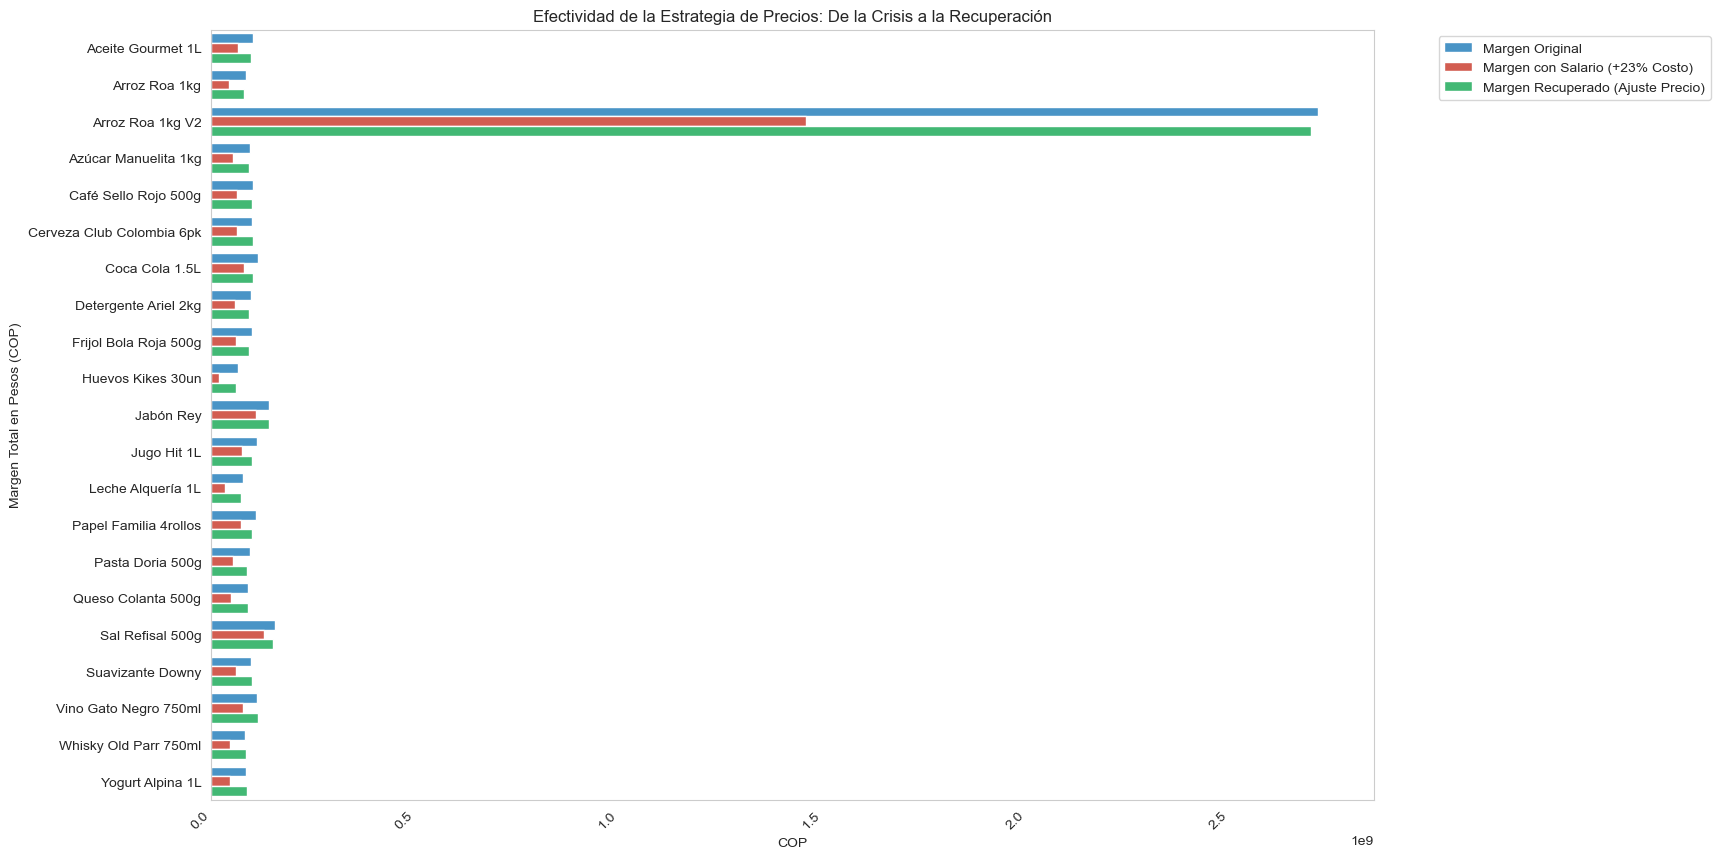

In [39]:
plt.figure(figsize=(15, 10))
df_plot = tabla_final.melt(id_vars=['Producto', 'Demanda'], var_name='Escenario', value_name='COP')

sns.barplot(data=df_plot, x='COP', y='Producto', hue='Escenario', palette=['#3498db', '#e74c3c', '#2ecc71'])
plt.xticks(rotation=45, ha='right')
plt.title('Efectividad de la Estrategia de Precios: De la Crisis a la Recuperación')
plt.ylabel('Margen Total en Pesos (COP)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show();